# **Exercício 3 - PSI3471** (2024 - $1^o$ semestre)

|Alunos da Dupla                   |NUSP    |E-mail USP       |
|----------------------------------|--------|-----------------|
|Gustavo Henrique da Silva Amaral  |12551686|gustavo.amaral7@usp.br|
|Thiago da Rocha Calomino Gonçalves|12554647|thcalomino@usp.br|

Link: [Enunciado do Exercício 3 - MLP](https://psi3471.github.io/ex_entrega_3.html)

# Instalação de dependências

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Funções a serem modeladas

A implementação da rede neural usará o treinamento com o algoritmo de retropropagação (_backpropagation_) para modelar as seguintes funções:

1. $f_a(x) = \dfrac{1}{x}, 1\leq x \leq 100$
1. $f_b(x) = log_{10}x, 1\leq x \leq 10$
1. $f_c(x) = e^{-x}, 1\leq x \leq 10$
1. $f_d(x) = \sin{(x)}, 1\leq x \leq \dfrac{\pi}{2}$

- Implemente uma rede neural com uma entrada, um número variável de neurônios na camada oculta e uma saída. Para tanto, uma sugestão é implementar duas funções:
  - Treinamento, que recebe o sinal de entrada, o passo de adaptação, o número de épocas e o número de neurônios da camada oculta e retorna os pesos da rede treinada e um sinal com o valor da função custo ao longo das épocas;
  - Inferência: que recebe os pesos da rede, o número de neurônios na camada oculta (também poderia obter essa informação a partir dos pesos) e uma entrada e retorna a saída da rede.

In [ ]:
# Funções

fa = lambda x: 1/x
fb = lambda x: np.log10(x)
fc = lambda x: np.exp(-x)
fd = lambda x: np.sin(x)

Para se gerar pontos onde as funções serão treinadas, serão gerados pontos aleatórios entre os intervalos desejados.

In [ ]:
N_pontos_treino = 5000

# Obtendo os valores de X para a função fa

#points_of_x_100 = np.linspace(1, 100, 10)
xmin, xmax, qtd = 1, 100, N_pontos_treino
x = np.random.random(qtd).cumsum()
x = (x - x.min()) / x.ptp()
points_of_x_100 = (xmax - xmin) * x + xmin #points_of_x_100 é um vetor crescente com números aleatórios entre 1 e 100


# Obtendo os valores de X para as funções fb e fc

#points_of_x_10 = np.linspace(1, 10, 10)
xmin, xmax, qtd = 1, 10, N_pontos_treino
x = np.random.random(qtd).cumsum()
x = (x - x.min()) / x.ptp()
points_of_x_10 = (xmax - xmin) * x + xmin #points_of_x_10 é um vetor crescente com números aleatórios entre 1 e 10


# Obtendo os valores de X para a função fd

#points_of_x_pi_2 = np.linspace(1, np.pi/2, 1000)
xmin, xmax, qtd = 1, np.pi/2, N_pontos_treino
x = np.random.random(qtd).cumsum()
x = (x - x.min()) / x.ptp()
points_of_x_pi_2 = (xmax - xmin) * x + xmin #points_of_x_pi_2 é um vetor crescente com números aleatórios entre 1 e pi/2

In [ ]:
# Dados de treino para cada função

fa_data_train = np.array([points_of_x_100, fa(points_of_x_100)]).T
fb_data_train = np.array([points_of_x_10, fb(points_of_x_10)]).T
fc_data_train = np.array([points_of_x_10, fc(points_of_x_10)]).T
fd_data_train = np.array([points_of_x_pi_2, fd(points_of_x_pi_2)]).T

# Gráficos das funções

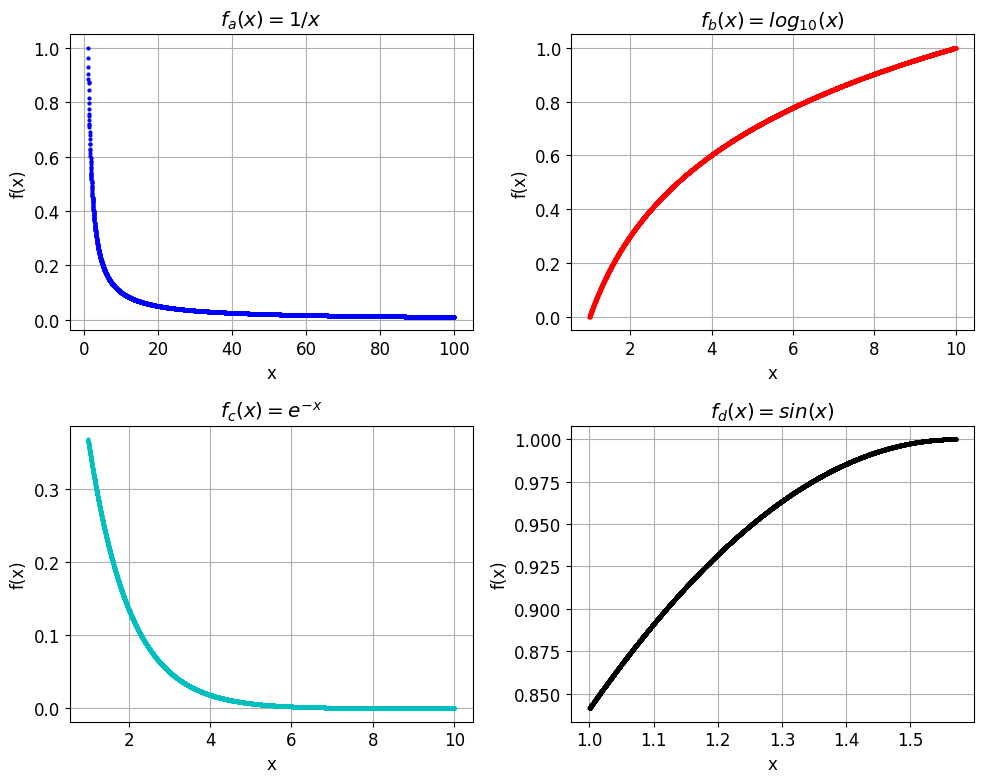

In [ ]:
# Definindo os dados de cada função
data_sets = [fa_data_train, fb_data_train, fc_data_train, fd_data_train]
titles = [r"$f_a(x) = 1/x$", r"$f_b(x) = log_{10}(x)$", r"$f_c(x) = e^{-x}$", r"$f_d(x) = sin(x)$"]
colors = ['b', 'r', 'c', 'k']  # Lista de cores para cada gráfico

# Configurações globais para os gráficos
plt.rcParams.update({'font.size': 12})

# Criando a matriz de gráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterando sobre os dados e títulos para plotagem
for i, (data, title, color) in enumerate(zip(data_sets, titles, colors)):
    row = i // 2
    col = i % 2
    axs[row, col].plot(data[:, 0], data[:, 1], 'o', markersize=2, color = color)
    axs[row, col].set_title(title)
    axs[row, col].set_xlabel("x")
    axs[row, col].set_ylabel("f(x)")
    axs[row, col].grid(True)  # Adicionando a grade

plt.tight_layout()
plt.show()

# Treinamento da rede MLP

- Crie dois conjuntos de dados, um deles para treinamento da rede e outro para o teste. Considere entre 1000 a 10000 pontos para treinamento e 1000 para teste;
- Avalie o desempenho da rede para cada caso, calculando o erro quadrático médio obtido no conjunto de teste e plotando gráficos da funções e das aproximações obtidas com a rede, considerando os seguintes números de neurônios na camada oculta: 3, 4, 5, 10, 15, 20, 50, 100.

Ao final do exercício, você deverá apresentar:

1. Os códigos utilizados para treinar e fazer a inferência com os seus modelos;
2. Um conjunto de gráficos das aproximações obtidas para cada função usando dados de teste, com os diferentes números de neurônios na camada oculta;
3. Uma tabela com o erro quadrático médio obtido no teste, para cada função, com diferentes números de neurônios na camada oculta.

**Função de ativação sigmoidal**

Será aplicada sobre os neurônios da camada oculta e da camada de saída

> Note que as funções sempre retornam valores entre 0 e 1 nos intervalos indicados

In [ ]:
def sigmoide(x):
    return 1/(1+np.exp(-x))

def redeMLP(x, W1, W2):
    # Camada oculta
    z = sigmoide(x @ W1)
    # Camada de saída
    y = z @ W2
    return y, z

In [ ]:
def Treinamento(x, d, eta, Nepocas, Nneuronios):
    # Inicialização dos pesos
    Nx = x.shape[1]
    n_ocultos = Nneuronios
    n_saidas = d.shape[1]
    W1 = 0.02 * np.random.rand(Nx, n_ocultos + 1) - 0.01
    W2 = 0.02 * np.random.rand(n_ocultos + 1, n_saidas) - 0.01

    # Parâmetros do treinamento
    J_MSE = []
    N = x.shape[0]
    Nb = 50 # Tamanho do mini-batch
    for epoca in range(Nepocas):
        indices = np.arange(N)
        np.random.shuffle(indices)
        x = x[indices]
        d = d[indices]

        for k in range(0, N, Nb):
            xk = x[k:k+Nb]
            dk = d[k:k+Nb]

            # Forward pass
            y, z = redeMLP(xk, W1, W2)

            # Backward pass
            delta_saida = y - dk
            delta_oculta = z * (1 - z) * np.dot(delta_saida, W2.T)

            # Atualização dos pesos
            dW2 = z.T @ delta_saida
            dW1 = (np.concatenate((xk, np.ones((xk.shape[0], 1))), axis=1).T @ delta_oculta)
            W2 = W2 - eta * dW2 / Nb
            W1 = W1 - eta * dW1[:-1, :] / Nb

        # Cálculo do erro médio quadrático
        y, _ = redeMLP(x, W1, W2)
        J_MSE.append(np.mean((d - y)**2))

        if epoca % 1000 == 0: # PRINT DA ÉPOCA
          print(f"Época: {epoca}, MSE: {J_MSE[epoca]}")

    return W1, W2, J_MSE

Nos 4 treinamentos abaixos, sabemos o número de neurônios em cada camada oculta: 3, 4, 5, 10, 15, 20, 50, 100.

## Treino da rede de $f_a(x) = 1/x$

In [ ]:
x = np.array([fa_data_train[:, 0]]).T
d = np.array([fa_data_train[:, 1]]).T

neuronios = [3, 4, 5, 10, 15, 20, 50, 100]

for n in neuronios:
    print("\n \t Treinando a rede de " + str(n) + " neurônios.")
    Wcamadaoculta, Wcamadasaida, J_MSE = Treinamento(x=x, d=d, eta=0.5, Nepocas=5000, Nneuronios=n)
    globals()["Wcamadaoculta{}_fa".format(n)] = Wcamadaoculta
    globals()["Wcamadasaida{}_fa".format(n)] = Wcamadasaida
    globals()["J_MSE{}_fa".format(n)] = J_MSE


 	 Treinando a rede de 3 neurônios.
Época: 0, MSE: 0.0023845798311471094
Época: 1000, MSE: 1.1042258582505126e-05
Época: 2000, MSE: 1.0039234330591562e-05
Época: 3000, MSE: 9.948712423479634e-06
Época: 4000, MSE: 9.87701360986716e-06

 	 Treinando a rede de 4 neurônios.
Época: 0, MSE: 0.0023974691542583103
Época: 1000, MSE: 1.1332825839787703e-05
Época: 2000, MSE: 9.846972085376724e-06
Época: 3000, MSE: 9.28070191139304e-06
Época: 4000, MSE: 8.154363493173666e-06

 	 Treinando a rede de 5 neurônios.
Época: 0, MSE: 0.002415208339052091
Época: 1000, MSE: 8.09664033060363e-06
Época: 2000, MSE: 4.16069276782619e-06
Época: 3000, MSE: 2.2463487820483725e-06
Época: 4000, MSE: 1.7166216245357438e-06

 	 Treinando a rede de 10 neurônios.
Época: 0, MSE: 0.0023205409483847317
Época: 1000, MSE: 1.0353997556252728e-05
Época: 2000, MSE: 4.021867902561569e-06
Época: 3000, MSE: 2.5996470574978538e-06
Época: 4000, MSE: 1.9385587737270433e-06

 	 Treinando a rede de 15 neurônios.
Época: 0, MSE: 0.00270

## Treino da rede de $f_b(x) = log_{10} x$

In [ ]:
x = np.array([fb_data_train[:, 0]]).T
d = np.array([fb_data_train[:, 1]]).T

neuronios = [3, 4, 5, 10, 15, 20, 50, 100]

for n in neuronios:
    print("\n \t Treinando a rede de " + str(n) + " neurônios.")
    Wcamadaoculta, Wcamadasaida, J_MSE = Treinamento(x=x, d=d, eta=0.5, Nepocas=5000, Nneuronios=n)
    globals()["Wcamadaoculta{}_fb".format(n)] = Wcamadaoculta
    globals()["Wcamadasaida{}_fb".format(n)] = Wcamadasaida
    globals()["J_MSE{}_fb".format(n)] = J_MSE


 	 Treinando a rede de 3 neurônios.
Época: 0, MSE: 0.029778555787703498
Época: 1000, MSE: 0.026352549733252413
Época: 2000, MSE: 0.026095774590802256
Época: 3000, MSE: 0.026340818968551696
Época: 4000, MSE: 0.029173040566025862

 	 Treinando a rede de 4 neurônios.
Época: 0, MSE: 0.028967736219356537
Época: 1000, MSE: 0.027297957033682888
Época: 2000, MSE: 0.028309989938333592
Época: 3000, MSE: 0.02638414169214179
Época: 4000, MSE: 0.028119924912674038

 	 Treinando a rede de 5 neurônios.
Época: 0, MSE: 0.029230634695648194
Época: 1000, MSE: 0.00018185583632568029
Época: 2000, MSE: 0.00018375539297173834
Época: 3000, MSE: 0.00018270575595891137
Época: 4000, MSE: 0.00018333328151324006

 	 Treinando a rede de 10 neurônios.
Época: 0, MSE: 0.03161898320737299
Época: 1000, MSE: 1.9618092405995414e-06
Época: 2000, MSE: 9.328522147741224e-07
Época: 3000, MSE: 7.239423166993718e-07
Época: 4000, MSE: 1.3423415312361827e-06

 	 Treinando a rede de 15 neurônios.
Época: 0, MSE: 0.0067684738680572

## Treino da rede de $f_c(x) = e^{-x}$

In [ ]:
x = np.array([fc_data_train[:, 0]]).T
d = np.array([fc_data_train[:, 1]]).T

neuronios = [3, 4, 5, 10, 15, 20, 50, 100]

for n in neuronios:
    print("\n \t Treinando a rede de " + str(n) + " neurônios.")
    Wcamadaoculta, Wcamadasaida, J_MSE = Treinamento(x=x, d=d, eta=0.5, Nepocas=5000, Nneuronios=n)
    globals()["Wcamadaoculta{}_fc".format(n)] = Wcamadaoculta
    globals()["Wcamadasaida{}_fc".format(n)] = Wcamadasaida
    globals()["J_MSE{}_fc".format(n)] = J_MSE


 	 Treinando a rede de 3 neurônios.
Época: 0, MSE: 0.005167546775430009
Época: 1000, MSE: 1.4624499001454442e-06
Época: 2000, MSE: 1.373965294046831e-06
Época: 3000, MSE: 1.2110700773836116e-06
Época: 4000, MSE: 9.619387639056724e-07

 	 Treinando a rede de 4 neurônios.
Época: 0, MSE: 0.0054783491508611165
Época: 1000, MSE: 2.3019518163038865e-07
Época: 2000, MSE: 1.3437861372389486e-07
Época: 3000, MSE: 1.1140963778228651e-07
Época: 4000, MSE: 1.0559521050312612e-07

 	 Treinando a rede de 5 neurônios.
Época: 0, MSE: 0.00541550439824195
Época: 1000, MSE: 1.3625911613635911e-06
Época: 2000, MSE: 9.455788961270034e-07
Época: 3000, MSE: 5.35182410316488e-07
Época: 4000, MSE: 4.721192120954204e-07

 	 Treinando a rede de 10 neurônios.
Época: 0, MSE: 0.005439382597844248
Época: 1000, MSE: 8.741878285748753e-07
Época: 2000, MSE: 4.680861031122878e-07
Época: 3000, MSE: 3.7337747059683303e-07
Época: 4000, MSE: 3.292041522095339e-07

 	 Treinando a rede de 15 neurônios.
Época: 0, MSE: 0.00527

## Treino da rede de $f_d(x) = \sin x$

In [ ]:
x = np.array([fd_data_train[:, 0]]).T
d = np.array([fd_data_train[:, 1]]).T

neuronios = [3, 4, 5, 10, 15, 20, 50, 100]

for n in neuronios:
    print("\n \t Treinando a rede de " + str(n) + " neurônios.")
    Wcamadaoculta, Wcamadasaida, J_MSE = Treinamento(x=x, d=d, eta=0.5, Nepocas=5000, Nneuronios=n)
    globals()["Wcamadaoculta{}_fd".format(n)] = Wcamadaoculta
    globals()["Wcamadasaida{}_fd".format(n)] = Wcamadasaida
    globals()["J_MSE{}_fd".format(n)] = J_MSE


 	 Treinando a rede de 3 neurônios.
Época: 0, MSE: 0.001766862772438165
Época: 1000, MSE: 0.0002552551009303202
Época: 2000, MSE: 0.00026975573312170944
Época: 3000, MSE: 0.00024953144766121327
Época: 4000, MSE: 0.0002521637533111108

 	 Treinando a rede de 4 neurônios.
Época: 0, MSE: 0.0019525610647595734
Época: 1000, MSE: 0.00024942424956560737
Época: 2000, MSE: 0.0002512936857267655
Época: 3000, MSE: 0.00025007311066665825
Época: 4000, MSE: 0.0002493359204038001

 	 Treinando a rede de 5 neurônios.
Época: 0, MSE: 0.0019988495207913476
Época: 1000, MSE: 9.272409447603775e-05
Época: 2000, MSE: 0.0003618855014866514
Época: 3000, MSE: 0.000322690794895975
Época: 4000, MSE: 4.361422388769661e-05

 	 Treinando a rede de 10 neurônios.
Época: 0, MSE: 0.0022805510084974367
Época: 1000, MSE: 0.00011856254058023468
Época: 2000, MSE: 0.00020696598268837206
Época: 3000, MSE: 4.4822513065167946e-05
Época: 4000, MSE: 0.00011380002365961352

 	 Treinando a rede de 15 neurônios.
Época: 0, MSE: 0.00

# Função da inferência

In [ ]:
def Inferencia(xteste, Wcamadaoculta, Wcamadasaida, Nneuronios):
    # Adiciona o bias na camada de entrada
    z_in = np.concatenate((xteste.reshape(1, -1), np.ones((1, 1))), axis=1)

    # Calcula a saída da camada oculta
    z_out = z_in.T @ Wcamadaoculta
    z_out = 1 / (1 + np.exp(-z_out))

    y_in = z_out

    # Calcula a saída da rede
    y_out = y_in @ Wcamadasaida

    return y_out

## Inferência de valores de teste de cada função

In [ ]:
################################################################
########### Inferência de valores de teste de f_a(x) ###########
# Obtendo xteste (randomizando para obter novos valores na hora de testar)
xmin, xmax, qtd = 1, 100, 1000
x = np.random.random(qtd).cumsum()
x = (x - x.min()) / x.ptp()  # Rescale to desired range
xtestefa = (xmax - xmin) * x + xmin

# Lista de quantidades de neurônios
neuronios = [3, 4, 5, 10, 15, 20, 50, 100]

# Dicionários para armazenar os resultados das inferências
ytestefa = {}

# Realizando as inferências para cada quantidade de neurônios
for n in neuronios:
    ytestefa[n] = Inferencia(xtestefa, globals()["Wcamadaoculta{}_fa".format(n)], globals()["Wcamadasaida{}_fa".format(n)], n)





################################################################
########### Inferência de valores de teste de f_b(x) ###########
# Obtendo xteste (randomizando para obter novos valores na hora de testar)
xmin, xmax, qtd = 1, 100, 1000
x = np.random.random(qtd).cumsum()
x = (x - x.min()) / x.ptp()  # Rescale to desired range
xtestefb = (xmax - xmin) * x + xmin

# Lista de quantidades de neurônios
neuronios = [3, 4, 5, 10, 15, 20, 50, 100]

# Dicionários para armazenar os resultados das inferências
ytestefb = {}

# Realizando as inferências para cada quantidade de neurônios
for n in neuronios:
    ytestefb[n] = Inferencia(xtestefb, globals()["Wcamadaoculta{}_fb".format(n)], globals()["Wcamadasaida{}_fb".format(n)], n)





################################################################
########### Inferência de valores de teste de f_c(x) ###########
# Obtendo xteste (randomizando para obter novos valores na hora de testar)
xmin, xmax, qtd = 1, 100, 1000
x = np.random.random(qtd).cumsum()
x = (x - x.min()) / x.ptp()  # Rescale to desired range
xtestefc = (xmax - xmin) * x + xmin

# Lista de quantidades de neurônios
neuronios = [3, 4, 5, 10, 15, 20, 50, 100]

# Dicionários para armazenar os resultados das inferências
ytestefc = {}

# Realizando as inferências para cada quantidade de neurônios
for n in neuronios:
    ytestefc[n] = Inferencia(xtestefc, globals()["Wcamadaoculta{}_fc".format(n)], globals()["Wcamadasaida{}_fc".format(n)], n)





################################################################
########### Inferência de valores de teste de f_d(x) ###########
# Obtendo xteste (randomizando para obter novos valores na hora de testar)
xmin, xmax, qtd = 1, 100, 1000
x = np.random.random(qtd).cumsum()
x = (x - x.min()) / x.ptp()  # Rescale to desired range
xtestefd = (xmax - xmin) * x + xmin

# Lista de quantidades de neurônios
neuronios = [3, 4, 5, 10, 15, 20, 50, 100]

# Dicionários para armazenar os resultados das inferências
ytestefd = {}

# Realizando as inferências para cada quantidade de neurônios
for n in neuronios:
    ytestefd[n] = Inferencia(xtestefd, globals()["Wcamadaoculta{}_fd".format(n)], globals()["Wcamadasaida{}_fd".format(n)], n)

<ipython-input-17-42966cec73b7>:7: RuntimeWarning: overflow encountered in exp
  z_out = 1 / (1 + np.exp(-z_out))


## Gráficos de cada inferência

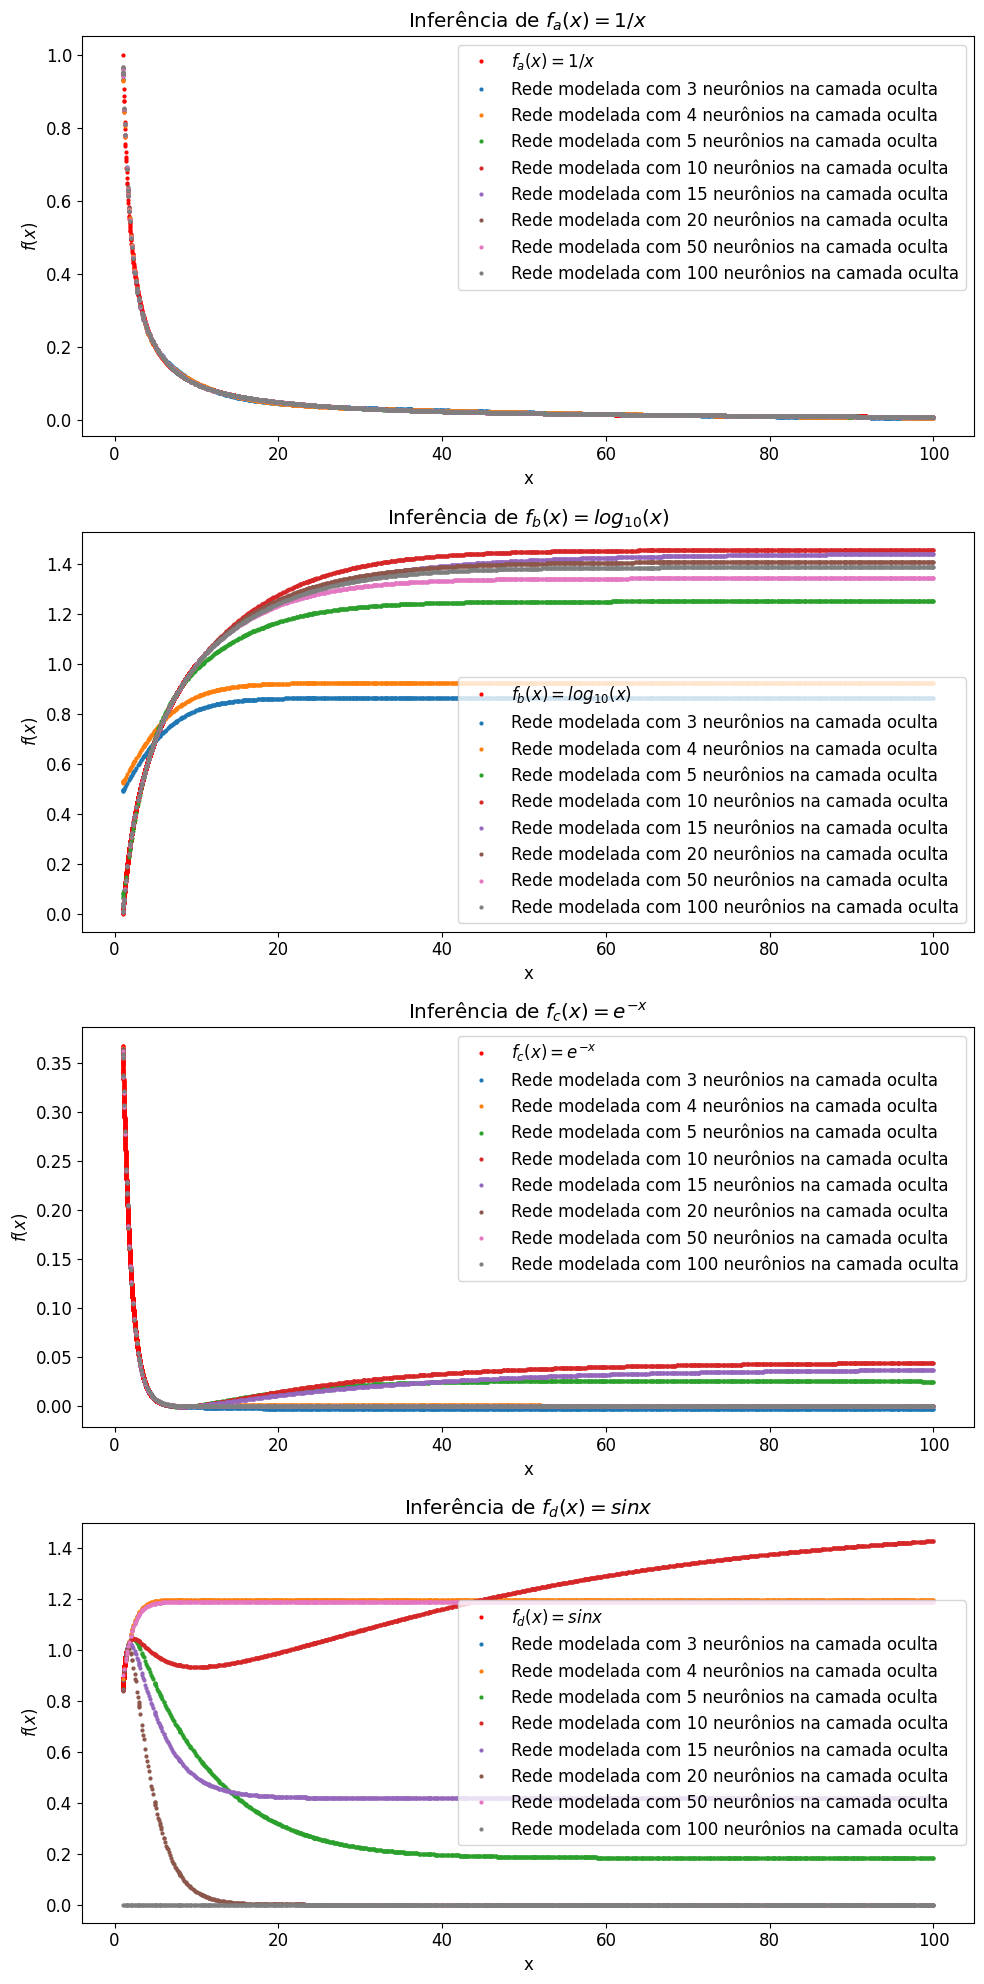

In [ ]:
# Criando uma figura e os subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Funções e seus respectivos dados
funcoes = ['f_a(x) = 1/x', 'f_b(x) = log_{10}(x)', 'f_c(x) = e^{-x}', 'f_d(x) = sinx']
xtestes = [xtestefa, xtestefb, xtestefc, xtestefd]
ytestes = [ytestefa, ytestefb, ytestefc, ytestefd]
data_train = [fa_data_train, fb_data_train, fc_data_train, fd_data_train]

# Loop sobre as funções
for i, (funcao, xteste, yteste, dados) in enumerate(zip(funcoes, xtestes, ytestes, data_train)):
    axs[i].plot(dados[:, 0], dados[:, 1], 'ro', markersize=2, label=f"${funcao}$")
    for n in neuronios:
        axs[i].plot(xteste, yteste[n][:-1, 0], 'o', markersize=2, label=f"Rede modelada com {n} neurônios na camada oculta")
    axs[i].set_title(f"Inferência de ${funcao}$")
    axs[i].set_ylabel("$f(x)$")
    axs[i].set_xlabel("x")
    axs[i].legend()

# Ajustando o layout
plt.tight_layout()
plt.show()

# Resultado dos erros quadráticos

## Erros para $f_a(x)$

In [ ]:
# Criação de uma lista para armazenar os erros e calcular o MSE
MSEfa = []

# Lista de quantidades de neurônios
neuronios = [3, 4, 5, 10, 15, 20, 50, 100]

# Lista para armazenar os erros
erroTeste = []

# Adicionando os erros à lista
for n in neuronios:
    erroTeste.append(ytestefa[n][:1000])  # Aqui ajustamos para pegar os primeiros 1000 valores

# Obtendo os valores reais da função 'fa'
fa_valores = fa(xtestefa)[:1000]  # Presumindo que 'fa' é uma função que retorna os valores reais da função

# Calculando o MSE para cada erro
for erro in erroTeste:
    MSEfa.append(np.sum((erro - fa_valores.reshape(-1, 1)) ** 2) / len(erro))

## Erros para $f_b(x)$

In [ ]:
# Criação de uma lista para armazenar os erros e calcular o MSE
MSEfb = []

# Lista de quantidades de neurônios
neuronios = [3, 4, 5, 10, 15, 20, 50, 100]

# Lista para armazenar os erros
erroTeste = []

# Adicionando os erros à lista
for n in neuronios:
    erroTeste.append(ytestefb[n][:1000])  # Aqui ajustamos para pegar os primeiros 1000 valores

# Obtendo os valores reais da função 'fb'
fb_valores = fb(xtestefb)[:1000]  # Presumindo que 'fb' é uma função que retorna os valores reais da função

# Calculando o MSE para cada erro
for erro in erroTeste:
    MSEfb.append(np.sum((erro - fb_valores.reshape(-1, 1)) ** 2) / len(erro))

## Erros para $f_c(x)$

In [ ]:
# Criação de uma lista para armazenar os erros e calcular o MSE
MSEfc = []

# Lista de quantidades de neurônios
neuronios = [3, 4, 5, 10, 15, 20, 50, 100]

# Lista para armazenar os erros
erroTeste = []

# Adicionando os erros à lista
for n in neuronios:
    erroTeste.append(ytestefc[n][:1000])  # Aqui ajustamos para pegar os primeiros 1000 valores

# Obtendo os valores reais da função 'fc'
fc_valores = fc(xtestefc)[:1000]  # Presumindo que 'fc' é uma função que retorna os valores reais da função

# Calculando o MSE para cada erro
for erro in erroTeste:
    MSEfc.append(np.sum((erro - fc_valores.reshape(-1, 1)) ** 2) / len(erro))

## Erros para $f_d(x)$

In [ ]:
# Criação de uma lista para armazenar os erros e calcular o MSE
MSEfd = []

# Lista de quantidades de neurônios
neuronios = [3, 4, 5, 10, 15, 20, 50, 100]

# Lista para armazenar os erros
erroTeste = []

# Adicionando os erros à lista
for n in neuronios:
    erroTeste.append(ytestefd[n][:1000])  # Aqui ajustamos para pegar os primeiros 1000 valores

# Obtendo os valores reais da função 'fd'
fd_valores = fd(xtestefd)[:1000]  # Presumindo que 'fd' é uma função que retorna os valores reais da função

# Calculando o MSE para cada erro
for erro in erroTeste:
    MSEfd.append(np.sum((erro - fd_valores.reshape(-1, 1)) ** 2) / len(erro))

## Tabela de MSE para cada função

In [ ]:
## Print em tabela

# Print dos MSE de A
print(f"|{'Neurônios':^12}|{'MSEfa':^10}|")
print("+------------+----------+")

for i in range(len(MSEfa)):
    print(f"|{neuronios[i]:^12}|{MSEfa[i]:^10.8f}|")

print("+------------+----------+")





# Print dos MSE de B
print(f"|{'Neurônios':^12}|{'MSEfb':^10}|")
print("+------------+----------+")

for i in range(len(MSEfb)):
    print(f"|{neuronios[i]:^12}|{MSEfb[i]:^10.8f}|")

print("+------------+----------+")





# Print dos MSE de C
print(f"|{'Neurônios':^12}|{'MSEfc':^10}|")
print("+------------+----------+")

for i in range(len(MSEfc)):
    print(f"|{neuronios[i]:^12}|{MSEfc[i]:^10.8f}|")

print("+------------+----------+")





# Print dos MSE de D

print(f"|{'Neurônios':^12}|{'MSEfd':^10}|")
print("+------------+----------+")

for i in range(len(MSEfd)):
    print(f"|{neuronios[i]:^12}|{MSEfd[i]:^10.8f}|")

print("+------------+----------+")

| Neurônios  |  MSEfa   |
+------------+----------+
|     3      |0.00001532|
|     4      |0.00001242|
|     5      |0.00000417|
|     10     |0.00000470|
|     15     |0.00000384|
|     20     |0.00000347|
|     50     |0.00000520|
|    100     |0.00000352|
+------------+----------+
| Neurônios  |  MSEfb   |
+------------+----------+
|     3      |0.66442182|
|     4      |0.57926806|
|     5      |0.22702005|
|     10     |0.09633473|
|     15     |0.10918646|
|     20     |0.12146337|
|     50     |0.15978943|
|    100     |0.13336933|
+------------+----------+
| Neurônios  |  MSEfc   |
+------------+----------+
|     3      |0.00000570|
|     4      |0.00000107|
|     5      |0.00050497|
|     10     |0.00117889|
|     15     |0.00077089|
|     20     |0.00000007|
|     50     |0.00000011|
|    100     |0.00000020|
+------------+----------+
| Neurônios  |  MSEfd   |
+------------+----------+
|     3      |1.88588996|
|     4      |1.89800952|
|     5      |0.61583309|
|     10    